# **Project Overview**

This project explores both **supervised** and **unsupervised machine learning** techniques to analyze and group vehicles based on a set of numerical features. The dataset consists of various vehicle types with characteristics that help distinguish between categories buses, vans, and cars.


**Supervised Learning:**
* Models: `LogisticRegression`, `DecisionTree`, `RandomForest`, `SVM`, `XGBoost`
* Model evaluation: using `accuracy`, `confusion matrix`, and `classification report`

**Unsupervised Learning:**
* `PCA` for dimensionality reduction
* `K-Means` Clustering with Elbow Method and Silhouette Score
* `DBSCAN` for density-based clustering

> **This Notebook focuses on Supervised Machine Learning Classification Algorithms.**

# Key Insights

The dataset was split into training and testing sets, with feature and target variables appropriately assigned. Feature scaling was applied to both the training and testing sets using StandardScaler.

To identify the best-performing classification model, five machine learning algorithms were tested:

* **Logistic Regression**
* **Decision Tree**
* **Random Forest**
* **Suport Vector Machine (SVM)**
* **XGBoost**

Each model was first evaluated using default parameters, followed by tuning through hyperparameter optimization techniques such as Grid Search, Random Search, and manual adjustments.

**Key evaluation metrics included:**

* **Accuracy**
* **Precision, Recall, and F1-Score**
* **Confusion Matrix**


✅ **Logistic Regression**

Logistic Regression yielded outstanding results after several tuning iterations:

* Only 1 misclassification (Bus classified as Van)
* Perfect classification for Car class (36/36) and Van class (30/30)
* Overall accuracy: approximately 99.4% (162/163)

**Decision Tree**

Despite extensive tuning using Grid Search, Random Search, and manual methods, Decision Trees consistently underperformed compared to Logistic Regression:

* **Weakest performer** of the five models
* Car class: 35/36 correct (1 misclassified as Bus)
* Bus class: 90/97 correct (3 as Car, 4 as Van)
* Van class: 26/30 correct (4 as Bus)
* Overall accuracy: approximately 92.6% (151/163)

**Random Forest**

Random Forest performed strongly and surprisingly, tuned versions didn’t outperform the default configuration:

* Similar performance to XGBoost
* Car class: 35/36 correct (1 misclassified as Bus)
* Bus class: 93/97 correct (1 as Car, 3 as Van)
* Van class: 29/30 correct (1 as Bus)
* Overall accuracy: approximately 96.3% (157/163)

**Suport Vector Machine**

SVM started with a high baseline accuracy (~98.2%) and improved further after tuning:

* Matches Logistic Regression's high performance with only 1 misclassification (Bus classified as Car)
* Perfect for Car class (36/36) and Van class (30/30)
* Overall accuracy: approximately 99.4% (162/163)

**XGBoost**

XGBoost delivered strong results but did not outperform Logistic Regression or SVM:

* Car class: 35/36 correct (1 misclassified as Bus)
* Bus class: 93/97 correct (1 as Car, 3 as Van)
* Perfect for Van class (30/30)
* Overall accuracy: approximately 96.9% (158/163)

# Final Conclusion

This project demonstrates that, even when visual analysis reveals no clear separation between classes, machine learning models can successfully capture complex patterns for high-accuracy classification.

* **Simpler models** (Logistic Regression and SVM) actually **outperform** the more complex ensemble methods in this project.

* The **Bus class** appears to be the most challenging category across all models.

* **Decision Tree** shows the most misclassifications, particularly struggling with distinguishing between Bus and Van.

* All models show a generally high performance, with even the "worst" model (Decision Tree) achieving over **92% accuracy**.



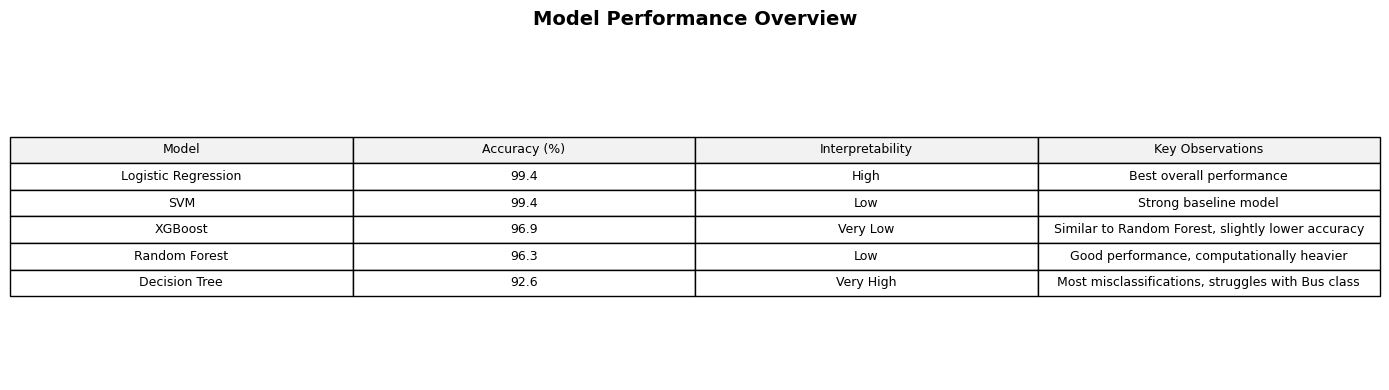

In [106]:
# Data
data = {
    "Model": ["Logistic Regression", "SVM", "XGBoost", "Random Forest", "Decision Tree"],
    "Accuracy (%)": [99.4, 99.4, 96.9, 96.3, 92.6],
    "Interpretability": ["High", "Low", "Very Low", "Low", "Very High"],
    "Key Observations": [
        "Best overall performance",
        "Strong baseline model",
        "Similar to Random Forest, slightly lower accuracy",
        "Good performance, computationally heavier",
        "Most misclassifications, struggles with Bus class"
    ]
}

df = pd.DataFrame(data)
df = df.sort_values(by="Accuracy (%)", ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(14, 4))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center', colColours=["#f2f2f2"] * len(df.columns))
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
plt.title("Model Performance Overview", fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Recomendation

For this specific classification problem:

* **Logistic Regression** and **SVM** should be considered **strong baseline models** due to their high accuracy and efficiency.
* **Random Forest** and **XGBoost** are good alternatives, especially when interpretability is less important and computational resources are available.
* **Decision Trees**, while more interpretable, performed significantly worse and may not be suitable if accuracy is a priority.

# **Import Liabraries and Dataset**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from scipy.stats import randint

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report,
    silhouette_score
)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X_train = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Classification_Clustering/Vehicle_Machine_Learning_Classification/Data/processed_X_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Classification_Clustering/Vehicle_Machine_Learning_Classification/Data/processed_X_test.csv')
y_train = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Classification_Clustering/Vehicle_Machine_Learning_Classification/Data/processed_y_train.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Data_Projects/Vehicle_Classification_Clustering/Vehicle_Machine_Learning_Classification/Data/processed_y_test.csv')

The dataset includes multiple numerical features that describe physical or operational characteristics of vehicles, such as:

* Compactness
*	Circularity
*	Distance circularity
*	Radius ratio
*	Aspect ratio
*	Elongatedness
*	Major and minor axis length


# Functions

In [26]:
def plot_confusion_matrix(y_test, y_pred, model_name='Model', figsize=(8, 6), cmap='Blues'):
    """
    Simple and elegant function to visualize confusion matrix for different models.

    Parameters:
    -----------
    y_test : array-like Ground truth labels
    y_pred : array-likePredicted labels
    model_name : str, optional Name of the model to include in the title
    figsize : tuple, optional Figure size (width, height)
    cmap : str, optional Colormap for the confusion matrix

    Returns:
    --------
    matplotlib Figure containing the plot
    """
    labels = ['Car', 'Bus', 'Van']

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Convert to pandas DataFrame with labels
    conf_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

    # Create plot
    plt.figure(figsize=figsize)

    # Plot confusion matrix
    sns.heatmap(conf_df, annot=True, cmap=cmap)

    # Set title and labels
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

In [32]:
def tune_dtree(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42):
    """
    Tune hyperparameters of a Decision Tree Classifier and evaluate its performance.

    Parameters:
    -----------
    max_depth : int or None, default=None
        The maximum depth of the tree. If None, nodes are expanded until all leaves
        are pure or contain less than min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node.
        - If int, then consider min_samples_split as the minimum number.
        - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples)
          is the minimum number of samples for each split.

    min_samples_leaf : int or float, default=1
        The minimum number of samples required to be at a leaf node.
        - If int, then consider min_samples_leaf as the minimum number.
        - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples)
          is the minimum number of samples for each leaf.

    random_state : int, default=42
        Controls the randomness of the estimator.

    Returns:
    --------
    dict : Dictionary containing the model, accuracy, confusion matrix, and classification report.
    """

    # Initialize the model with the specified hyperparameters
    dtree = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=random_state
    )

    # Fit the model
    dtree.fit(X_train, y_train)

    # Make predictions
    y_pred_dtree = dtree.predict(X_test)

    # Evaluate the model
    dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
    dtree_conf_matrix = confusion_matrix(y_test, y_pred_dtree)
    dtree_class_report = classification_report(y_test, y_pred_dtree)

    # Print evaluation metrics
    print("Decision Tree Classifier Evaluation")
    print("=" * 40)
    print(f"Model Parameters:")
    print(f"  - max_depth: {max_depth}")
    print(f"  - min_samples_split: {min_samples_split}")
    print(f"  - min_samples_leaf: {min_samples_leaf}")
    print(f"  - random_state: {random_state}")
    print("-" * 40)
    print(f"Accuracy: {dtree_accuracy:.4f}")
    print("Confusion Matrix:\n", dtree_conf_matrix)
    print("Classification Report:\n", dtree_class_report)

In [48]:
def tune_rf(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    """
    ## Random Forest Tuning and Evaluation

    This function trains and evaluates a Random Forest classifier on predefined train/test data.

    **Parameters:**
    - `n_estimators` (int): Number of trees in the forest. Default is 100.
    - `max_depth` (int or None): Maximum depth of the tree. Default is None (nodes are expanded until all leaves are pure).
    - `min_samples_split` (int): Minimum number of samples required to split an internal node. Default is 2.
    - `min_samples_leaf` (int): Minimum number of samples required to be at a leaf node. Default is 1.

    **Outputs:**
    - Prints accuracy, confusion matrix, and classification report.
    - Returns a dictionary of evaluation metrics (optional).
    """

    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    rf.fit(X_train, y_train)

    y_pred_rf = rf.predict(X_test)

    # Evaluation
    rf_accuracy = accuracy_score(y_test, y_pred_rf)
    rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
    rf_class_report = classification_report(y_test, y_pred_rf)

    print("Accuracy:", rf_accuracy)
    print("Confusion Matrix:\n", rf_conf_matrix)
    print("Classification Report:\n", rf_class_report)

    return {
        "model": rf,
        "accuracy": rf_accuracy,
        "confusion_matrix": rf_conf_matrix,
        "classification_report": rf_class_report
    }

In [64]:
# Function to conduct Grid Searc
def grid_search(model, param_grid, X_train=X_train, y_train=y_train):
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
  grid_search.fit(X_train, y_train)

  print('Best Parameters:', grid_search.best_params_)
  print('Best Score:', grid_search.best_score_)

In [65]:
# Function to conduct Random Search
def random_search(model, param_grid, X_train=X_train, y_train=y_train):
  random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='accuracy')
  random_search.fit(X_train, y_train)

  print('Best Parameters:', random_search.best_params_)
  print('Best Score:', random_search.best_score_)

# Logistic Regression

In [12]:
# Function for tuning hyperparameters LogisticRegression
def tune_log_reg(max_iter, C):
  log_reg = LogisticRegression(max_iter=max_iter, C=C)
  log_reg.fit(X_train, y_train)

  y_pred_logreg = log_reg.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred_logreg)
  class_report = classification_report(y_test, y_pred_logreg)
  conf_matrix = confusion_matrix(y_test, y_pred_logreg)

  print('Accuracy: ', accuracy)
  print('Classification Report: \n', class_report)
  print('Confusion Matrix: \n', conf_matrix)



In [11]:
# Convert DataFrame to 1D array
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Initialize and fit logistic regression with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_logreg)
class_report = classification_report(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print('Accuracy: ', accuracy)
print('Classification Report: \n', class_report)
print('Confusion Matrix: \n', conf_matrix)

Accuracy:  0.9754601226993865
Classification Report: 
               precision    recall  f1-score   support

         bus       0.95      0.97      0.96        36
         car       0.99      0.97      0.98        97
         van       0.97      1.00      0.98        30

    accuracy                           0.98       163
   macro avg       0.97      0.98      0.97       163
weighted avg       0.98      0.98      0.98       163

Confusion Matrix: 
 [[35  1  0]
 [ 2 94  1]
 [ 0  0 30]]


## Manual Hyperparameter Tuning

In [13]:
tune_log_reg(150, 10)

Accuracy:  0.9815950920245399
Classification Report: 
               precision    recall  f1-score   support

         bus       0.95      0.97      0.96        36
         car       0.99      0.98      0.98        97
         van       1.00      1.00      1.00        30

    accuracy                           0.98       163
   macro avg       0.98      0.98      0.98       163
weighted avg       0.98      0.98      0.98       163

Confusion Matrix: 
 [[35  1  0]
 [ 2 95  0]
 [ 0  0 30]]


In [14]:
tune_log_reg(150, 100)

Accuracy:  0.9938650306748467
Classification Report: 
               precision    recall  f1-score   support

         bus       1.00      1.00      1.00        36
         car       1.00      0.99      0.99        97
         van       0.97      1.00      0.98        30

    accuracy                           0.99       163
   macro avg       0.99      1.00      0.99       163
weighted avg       0.99      0.99      0.99       163

Confusion Matrix: 
 [[36  0  0]
 [ 0 96  1]
 [ 0  0 30]]


In [16]:
tune_log_reg(150, 1000)

Accuracy:  0.9877300613496932
Classification Report: 
               precision    recall  f1-score   support

         bus       1.00      1.00      1.00        36
         car       1.00      0.98      0.99        97
         van       0.94      1.00      0.97        30

    accuracy                           0.99       163
   macro avg       0.98      0.99      0.99       163
weighted avg       0.99      0.99      0.99       163

Confusion Matrix: 
 [[36  0  0]
 [ 0 95  2]
 [ 0  0 30]]


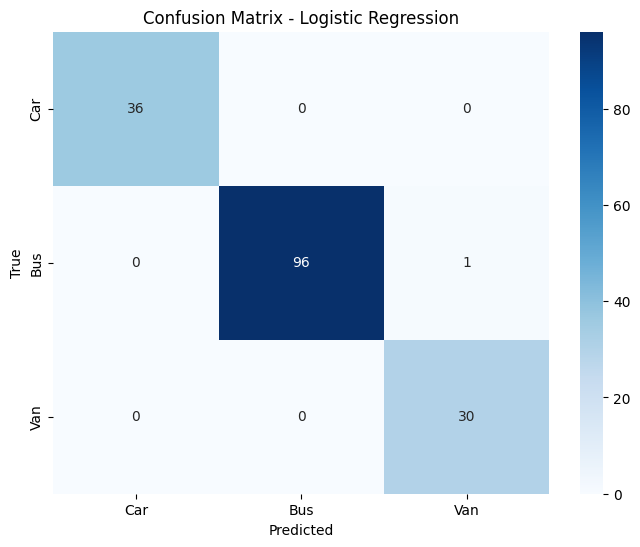

In [29]:
log_reg = LogisticRegression(max_iter=150, C=100)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)

plot_confusion_matrix(y_test, y_pred_logreg, model_name='Logistic Regression')

# Decison Tree

In [17]:
# Initialize DecisionTree with default parameters
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

# Evaluation
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_conf_matrix = confusion_matrix(y_test, y_pred_dtree)
dtree_class_report = classification_report(y_test, y_pred_dtree)

print("Accuracy:", dtree_accuracy)
print("Confusion Matrix:\n", dtree_conf_matrix)
print("Classification Report:\n", dtree_class_report)

Accuracy: 0.9202453987730062
Confusion Matrix:
 [[34  2  0]
 [ 4 89  4]
 [ 0  3 27]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.89      0.94      0.92        36
         car       0.95      0.92      0.93        97
         van       0.87      0.90      0.89        30

    accuracy                           0.92       163
   macro avg       0.90      0.92      0.91       163
weighted avg       0.92      0.92      0.92       163



## **Grid Search**

In [57]:
param_grid = {
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 6],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search(dtree, param_grid)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8876923076923078


In [58]:
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'criterion': ['gini', 'entropy']
}

grid_search(dtree, param_grid)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.9015384615384615


## Random Search

In [60]:
param_grid = {
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search(dtree, param_grid)

Best Parameters: {'max_depth': 14, 'min_samples_leaf': 4, 'min_samples_split': 3}
Best Score: 0.8830769230769231


In [61]:
param_grid = {
    'max_depth': randint(1, 40),
    'min_samples_split': randint(2, 40),
    'min_samples_leaf': randint(1, 20)
}

random_search(dtree, param_grid)

Best Parameters: {'max_depth': 31, 'min_samples_leaf': 2, 'min_samples_split': 4}
Best Score: 0.8799999999999999


In [62]:
param_grid = {
    'max_depth': randint(20, 60),
    'min_samples_split': randint(2, 40),
    'min_samples_leaf': randint(1, 20)
}

random_search(dtree, param_grid)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 20}
Best Score: 0.8784615384615384


In [63]:
param_grid = {
    'max_depth': randint(20, 60),
    'min_samples_split': randint(2, 40),
    'min_samples_leaf': randint(1, 10)
}

random_search(dtree, param_grid)

Best Parameters: {'max_depth': 52, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.889230769230769


## Manual Hyperparameter Tuning

In [33]:
tune_dtree(20)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 20
  - min_samples_split: 2
  - min_samples_leaf: 1
  - random_state: 42
----------------------------------------
Accuracy: 0.9264
Confusion Matrix:
 [[34  2  0]
 [ 3 89  5]
 [ 0  2 28]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.92      0.94      0.93        36
         car       0.96      0.92      0.94        97
         van       0.85      0.93      0.89        30

    accuracy                           0.93       163
   macro avg       0.91      0.93      0.92       163
weighted avg       0.93      0.93      0.93       163



In [34]:
tune_dtree(20, 4)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 20
  - min_samples_split: 4
  - min_samples_leaf: 1
  - random_state: 42
----------------------------------------
Accuracy: 0.9018
Confusion Matrix:
 [[34  2  0]
 [ 4 88  5]
 [ 1  4 25]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.87      0.94      0.91        36
         car       0.94      0.91      0.92        97
         van       0.83      0.83      0.83        30

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.89       163
weighted avg       0.90      0.90      0.90       163



In [35]:
tune_dtree(20, 4, 2)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 20
  - min_samples_split: 4
  - min_samples_leaf: 2
  - random_state: 42
----------------------------------------
Accuracy: 0.9080
Confusion Matrix:
 [[34  2  0]
 [ 4 88  5]
 [ 0  4 26]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.89      0.94      0.92        36
         car       0.94      0.91      0.92        97
         van       0.84      0.87      0.85        30

    accuracy                           0.91       163
   macro avg       0.89      0.91      0.90       163
weighted avg       0.91      0.91      0.91       163



In [36]:
tune_dtree(20, 4, 2, 10)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 20
  - min_samples_split: 4
  - min_samples_leaf: 2
  - random_state: 10
----------------------------------------
Accuracy: 0.9018
Confusion Matrix:
 [[34  2  0]
 [ 6 85  6]
 [ 0  2 28]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.85      0.94      0.89        36
         car       0.96      0.88      0.91        97
         van       0.82      0.93      0.88        30

    accuracy                           0.90       163
   macro avg       0.88      0.92      0.89       163
weighted avg       0.91      0.90      0.90       163



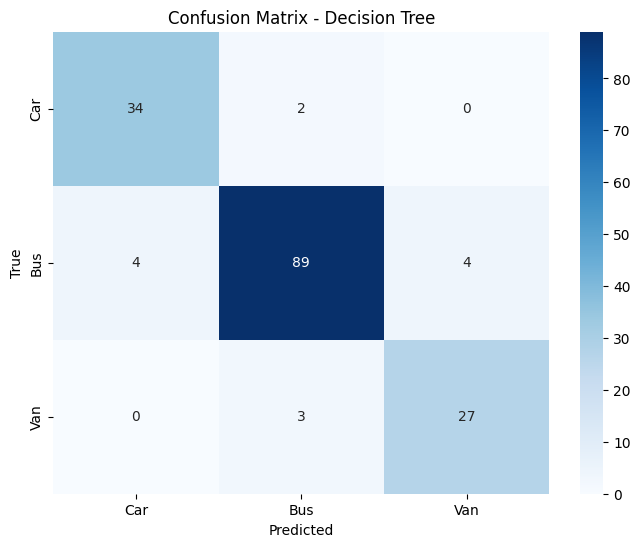

In [38]:
dtree = DecisionTreeClassifier(max_depth=20)
dtree.fit(X_train, y_train)

y_pred_dtree = dtree.predict(X_test)

plot_confusion_matrix(y_test, y_pred_dtree, model_name='Decision Tree')

# Random Forest

In [39]:
# Initialize Random Forest with default parameters
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluation
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
rf_class_report = classification_report(y_test, y_pred_rf)

print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_conf_matrix)
print("Classification Report:\n", rf_class_report)

Accuracy: 0.9631901840490797
Confusion Matrix:
 [[35  1  0]
 [ 1 92  4]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       0.99      0.95      0.97        97
         van       0.88      1.00      0.94        30

    accuracy                           0.96       163
   macro avg       0.95      0.97      0.96       163
weighted avg       0.97      0.96      0.96       163



## Manual Hyperparameter Tuning

In [49]:
tune_dtree(10)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 10
  - min_samples_split: 2
  - min_samples_leaf: 1
  - random_state: 42
----------------------------------------
Accuracy: 0.9264
Confusion Matrix:
 [[34  2  0]
 [ 3 89  5]
 [ 0  2 28]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.92      0.94      0.93        36
         car       0.96      0.92      0.94        97
         van       0.85      0.93      0.89        30

    accuracy                           0.93       163
   macro avg       0.91      0.93      0.92       163
weighted avg       0.93      0.93      0.93       163



In [51]:
tune_dtree(max_depth=10, min_samples_leaf=4)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 10
  - min_samples_split: 2
  - min_samples_leaf: 4
  - random_state: 42
----------------------------------------
Accuracy: 0.9018
Confusion Matrix:
 [[33  3  0]
 [ 3 88  6]
 [ 0  4 26]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.92      0.92      0.92        36
         car       0.93      0.91      0.92        97
         van       0.81      0.87      0.84        30

    accuracy                           0.90       163
   macro avg       0.89      0.90      0.89       163
weighted avg       0.90      0.90      0.90       163



In [52]:
tune_dtree(max_depth=10, min_samples_leaf=2, min_samples_split=6)

Decision Tree Classifier Evaluation
Model Parameters:
  - max_depth: 10
  - min_samples_split: 6
  - min_samples_leaf: 2
  - random_state: 42
----------------------------------------
Accuracy: 0.8957
Confusion Matrix:
 [[33  3  0]
 [ 4 88  5]
 [ 0  5 25]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.89      0.92      0.90        36
         car       0.92      0.91      0.91        97
         van       0.83      0.83      0.83        30

    accuracy                           0.90       163
   macro avg       0.88      0.89      0.88       163
weighted avg       0.90      0.90      0.90       163



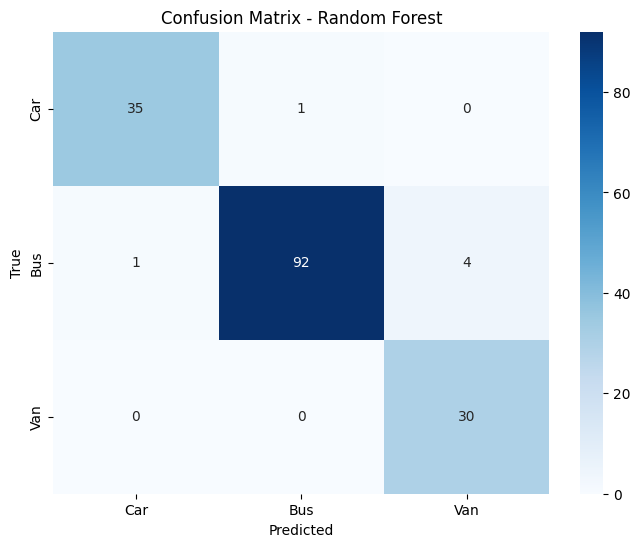

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

plot_confusion_matrix(y_test, y_pred_rf, model_name='Random Forest')

# Suport Vector Machine

In [66]:
# Initialize SVM with default parameters
svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

# Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

print('Accuracy of SVM: ', accuracy_svm)
print('Confusion Matrix of SVM: \n', conf_matrix_svm)
print("Classification Report:\n", class_report_svm)

Accuracy of SVM:  0.9815950920245399
Confusion Matrix of SVM: 
 [[36  0  0]
 [ 1 94  2]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      1.00      0.99        36
         car       1.00      0.97      0.98        97
         van       0.94      1.00      0.97        30

    accuracy                           0.98       163
   macro avg       0.97      0.99      0.98       163
weighted avg       0.98      0.98      0.98       163



In [69]:
# Function to tune SVM
def tune_svm(C=1.0, kernel='rbf', degree=3, gamma='scale'):
  svm_model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
  svm_model.fit(X_train, y_train)

  y_pred_svm = svm_model.predict(X_test)

  # Evaluation
  accuracy_svm = accuracy_score(y_test, y_pred_svm)
  conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
  class_report_svm = classification_report(y_test, y_pred_svm)

  print('Accuracy of SVM: ', accuracy_svm)
  print('Confusion Matrix of SVM: \n', conf_matrix_svm)
  print("Classification Report:\n", class_report_svm)

In [70]:
tune_svm(C=10)

Accuracy of SVM:  0.9938650306748467
Confusion Matrix of SVM: 
 [[36  0  0]
 [ 1 96  0]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      1.00      0.99        36
         car       1.00      0.99      0.99        97
         van       1.00      1.00      1.00        30

    accuracy                           0.99       163
   macro avg       0.99      1.00      0.99       163
weighted avg       0.99      0.99      0.99       163



In [71]:
tune_svm(C=100)

Accuracy of SVM:  0.9754601226993865
Confusion Matrix of SVM: 
 [[35  0  1]
 [ 1 94  2]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       1.00      0.97      0.98        97
         van       0.91      1.00      0.95        30

    accuracy                           0.98       163
   macro avg       0.96      0.98      0.97       163
weighted avg       0.98      0.98      0.98       163



In [73]:
tune_svm(C=10, kernel='linear')

Accuracy of SVM:  0.9877300613496932
Confusion Matrix of SVM: 
 [[35  1  0]
 [ 0 97  0]
 [ 1  0 29]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      0.97      0.97        36
         car       0.99      1.00      0.99        97
         van       1.00      0.97      0.98        30

    accuracy                           0.99       163
   macro avg       0.99      0.98      0.98       163
weighted avg       0.99      0.99      0.99       163



In [74]:
tune_svm(C=10, kernel='poly')

Accuracy of SVM:  0.9815950920245399
Confusion Matrix of SVM: 
 [[35  1  0]
 [ 0 95  2]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       1.00      0.97      0.99        36
         car       0.99      0.98      0.98        97
         van       0.94      1.00      0.97        30

    accuracy                           0.98       163
   macro avg       0.98      0.98      0.98       163
weighted avg       0.98      0.98      0.98       163



In [75]:
tune_svm(C=10, kernel='sigmoid')

Accuracy of SVM:  0.6503067484662577
Confusion Matrix of SVM: 
 [[24  7  5]
 [30 61  6]
 [ 5  4 21]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.41      0.67      0.51        36
         car       0.85      0.63      0.72        97
         van       0.66      0.70      0.68        30

    accuracy                           0.65       163
   macro avg       0.64      0.67      0.63       163
weighted avg       0.71      0.65      0.67       163



In [76]:
tune_svm(C=10, gamma='auto')

Accuracy of SVM:  0.9938650306748467
Confusion Matrix of SVM: 
 [[36  0  0]
 [ 1 96  0]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      1.00      0.99        36
         car       1.00      0.99      0.99        97
         van       1.00      1.00      1.00        30

    accuracy                           0.99       163
   macro avg       0.99      1.00      0.99       163
weighted avg       0.99      0.99      0.99       163



In [77]:
tune_svm(C=10, degree=6)

Accuracy of SVM:  0.9938650306748467
Confusion Matrix of SVM: 
 [[36  0  0]
 [ 1 96  0]
 [ 0  0 30]]
Classification Report:
               precision    recall  f1-score   support

         bus       0.97      1.00      0.99        36
         car       1.00      0.99      0.99        97
         van       1.00      1.00      1.00        30

    accuracy                           0.99       163
   macro avg       0.99      1.00      0.99       163
weighted avg       0.99      0.99      0.99       163



Accuracy of SVM:  0.9938650306748467


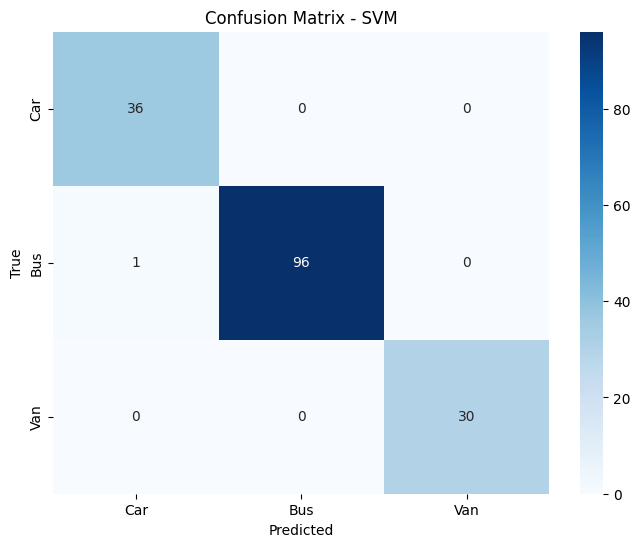

In [88]:
svm = SVC(C=10)
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

plot_confusion_matrix(y_test, y_pred_svm, model_name='SVM')
print('Accuracy of SVM: ', accuracy_score(y_test, y_pred_svm))

# XGBoost

In [81]:
# Encode Labels for XGBoost
y_train_encoded = LabelEncoder().fit_transform(y_train)
y_test_encoded = LabelEncoder().fit_transform(y_test)

In [83]:
# Initialize XGBoost with default parameters
xgb = XGBClassifier()
xgb.fit(X_train, y_train_encoded)

y_pred_xgb = xgb.predict(X_test)

# Evaluation
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
class_report_xgb = classification_report(y_test_encoded, y_pred_xgb)

print('Accuracy:', accuracy_xgb)
print('Confusion Matrix:\n', conf_matrix_xgb)
print('Classification Report:\n', class_report_xgb)

Accuracy: 0.950920245398773
Confusion Matrix:
 [[35  1  0]
 [ 1 91  5]
 [ 0  1 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.98      0.94      0.96        97
           2       0.85      0.97      0.91        30

    accuracy                           0.95       163
   macro avg       0.93      0.96      0.95       163
weighted avg       0.95      0.95      0.95       163



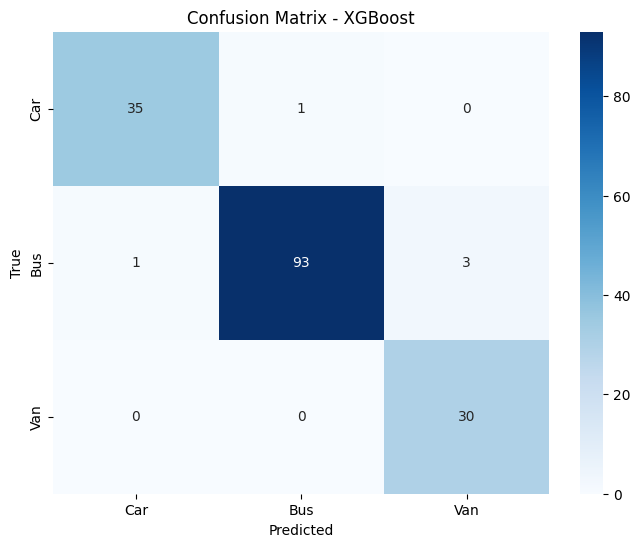

In [86]:
xgb = XGBClassifier(n_estimators=50, max_depth=4)
xgb.fit(X_train, y_train_encoded)

y_pred_xgb = xgb.predict(X_test)

plot_confusion_matrix(y_test_encoded, y_pred_xgb, model_name='XGBoost')

# Comparing Supervised Ml Models

In [93]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=150, C=100),
    'Decision Tree': DecisionTreeClassifier(max_depth=20, min_samples_split=4),
    'Random Forest': RandomForestClassifier(),
    'Suport Vector Machine': SVC(C=10)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.9938650306748467
Decision Tree Accuracy: 0.9141104294478528
Random Forest Accuracy: 0.9631901840490797
Suport Vector Machine Accuracy: 0.9938650306748467


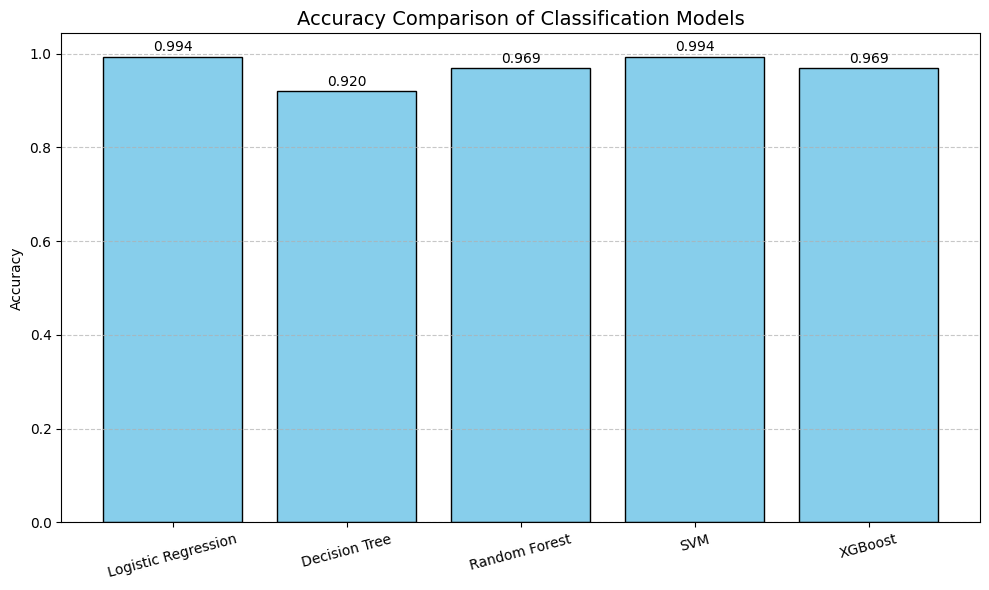

In [92]:
# Model names and their accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']
accuracies = [
    0.9938650306748467,
    0.9202453987730062,
    0.9693251533742331,
    0.9938650306748467,
    0.9693251533742331
]

# Visualize
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# For Loop to add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', ha='center', va='bottom', fontsize=10)


plt.title('Accuracy Comparison of Classification Models', fontsize=14)
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()